# Continuous Distribution

* We have studied Person's and chi2 as a way of testing discrete distributions
* Now we are going to study a way of handling continuos distibution Testing

# Loaded dice distributions

What if we can't observe a single roll. What if the dice get rolled, in this case, in sets of 10 at a time, and all we have is the total. The distribution of a `10d6` is not trivial! 

In fact, it is probably easier to calculate this distribution numerically rather than doing it analytically.

****

**What if we don't know the analytic distribution?**

Here we'll briefly look at the Kolmogorov-Smirnov test. But please note, it is meant for *continuous* distributions, I am using it on a discrete one simply to make it similar to previous examples, but you wouldn't do this if you wanted confidence in the results. In fact, the reason we are using 10 dice added together is to make our discrete distribution continuous enough.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

rolls_obs = np.loadtxt("../data/loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs, return_counts=True)
count_obs = count_obs / count_obs.sum()  # Noramlise


In [10]:
# Probability Density Function
rolls_fair = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(rolls_fair, return_counts=True)
count_fair = count_fair / count_fair.sum()  # Noramlise

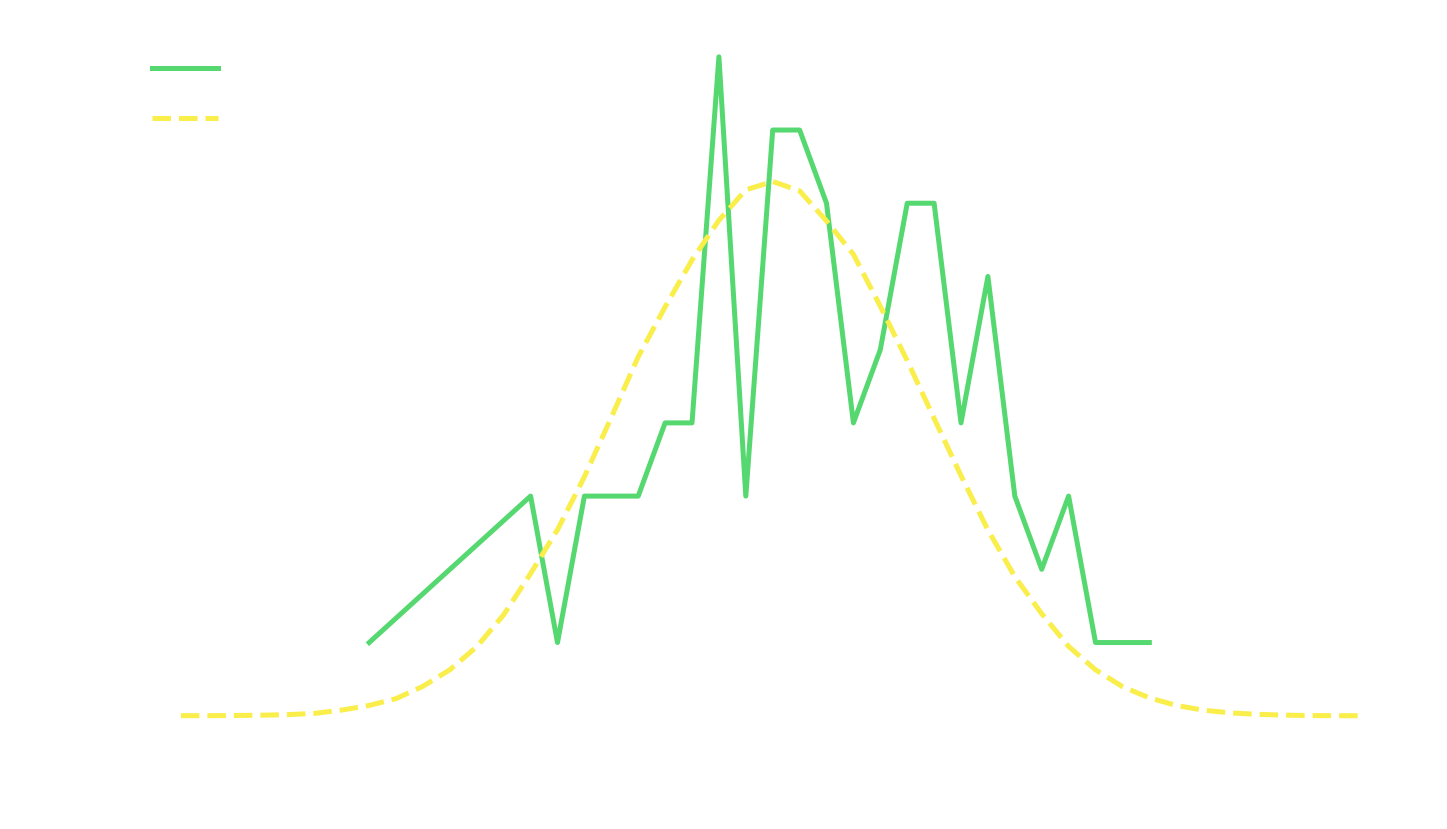

In [11]:
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair")
plt.legend()
plt.legend(loc=2);

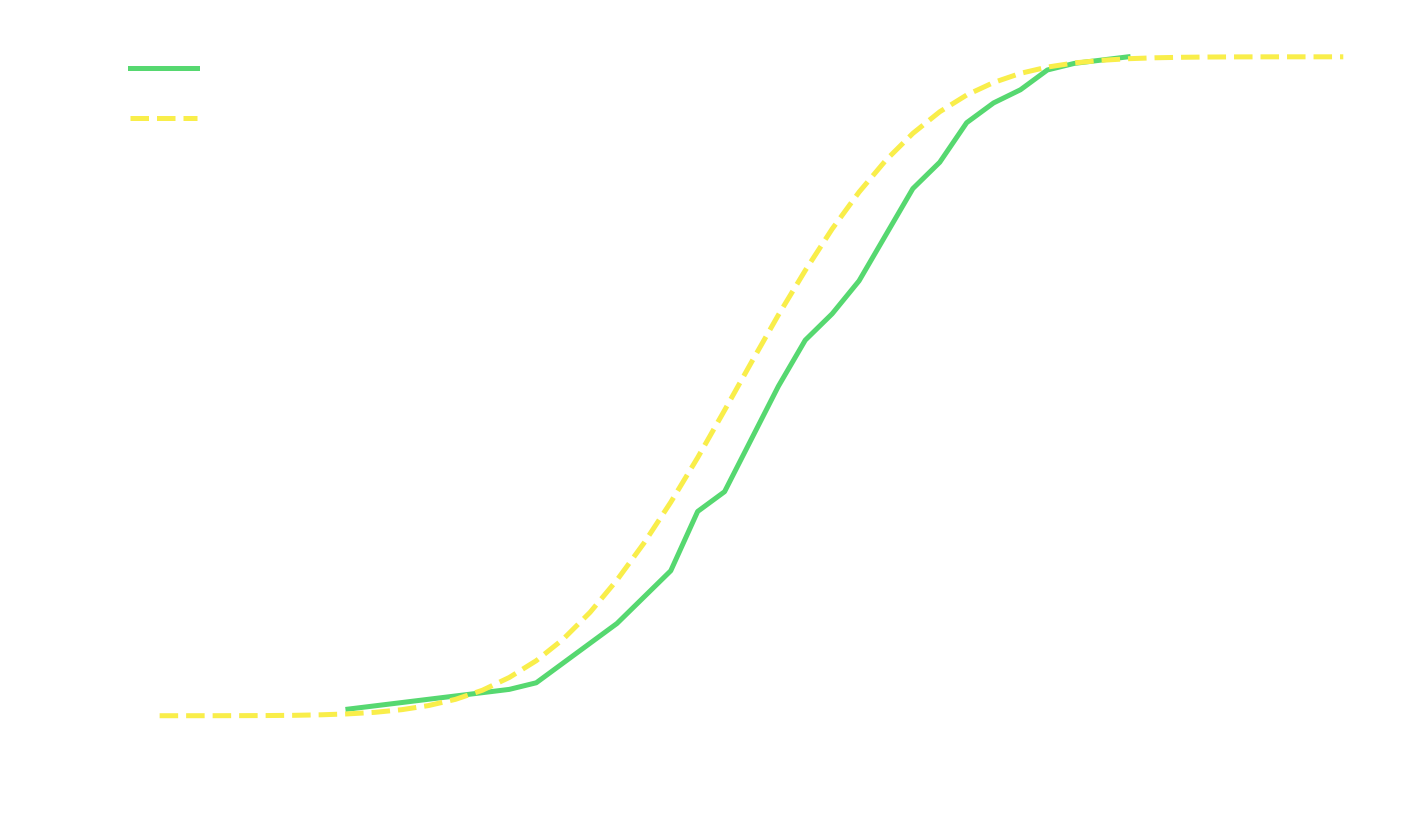

In [17]:
# Cumulative density function
# Data is already normalized, we are just summing everything up;
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label='Data')
plt.plot(unique2, cdf_fair, label='Fair')
plt.legend(loc=2);

In [19]:
# ks_2samp creates 2 empirical CDF functions for each data rolls_obs and rolls_fair
# Line between 2 differents CDF functions generate with the obs and fair data; get the biggest line

# Maximum distance between the two empirical cdf functions, the greater the distance the more confident
# of rejecting the Null Hypothesis

# The p-value is what is the probability of getting that distance if the two distribution were drawn for
# the same underling population
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs, rolls_fair)
print(f"KS test statistic of {statistic:.3f}, p-value of {pvalue:.3f}")

KS test statistic of 0.135, p-value of 0.053


# Anderson-Darling Test

**Check if one distribution come from one another, helping us to check if we should accept or reject the NULL Hypothesis**

An improvement on `the KS` test that gives `more weight to the tails` of the distribution (whilst the K-S test gives more weight in the center). The default test requires testing against analytic distributions (like the KS test), however you can also test two observed distributions.

In [23]:
# sig-level === p-value
from scipy.stats import anderson_ksamp
statistic, critical_value, sig_level = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, sig-level of {sig_level:.9f}")
print(f"Test critical values are {critical_value}")
print(f"Sig-level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")

AD test statistic of 5.35341, sig-level of 0.002596275
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig-level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]


**Summary**
    * Pose the question, formulate hypotheses
    * Determine the best tests to apply
    * Plot as you go.
    * State conclusions, including confidence

**Comments**
    * Write the question, in english and formulate our hypotheses plainly
    * Define what model to use; thinking about what distribution should we use to model our data set, and what test should we apply. Are we testing if  a value will respect a threshold? Are we testing if one distribution looks to one another? Are we testing something else? But figure out the test before we continue
    * Plot as we go, help us understand better the data, more insight into the data; allow us to build the history of our conclusions
    * State our conclusions clearly, what p-value we used, interval of confidence - confidence value is not our p-value;  if our p-value is 0.05 it only says that our test has to be bigger than 0.95 in our test but it doesn't mean that we are good for good, it only state that we have a confidence level of 1/20... which could not be enough; If we have 99.8% confidence we should say that not just leave as greater than 95%... it is important to show how confident we are.